# Random forest classification

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Data Set Information:

The dataset is related to red Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

That dataset can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [2]:
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
all_wine = pd.read_csv(data_link, sep=';')
all_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Attribute Information:

##### Input variables (based on physicochemical tests): 

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

##### Target variable (based on sensory data): 

12 - quality (score between 0 and 10)

In [6]:
print("Values of the target attribute 'quality':", set(all_wine.quality))

all_wine.fillna('Nan')
nans = 0
for col in all_wine.columns:
    for item in set(all_wine[col]):
        if item == 'Nan':
            nans = nans + 1
print('Number of NANs:', nans)

Values of the target attribute 'quality': {3, 4, 5, 6, 7, 8}
Number of NANs: 0


In [20]:
x3, x4, x5, x6, x7, x8 = 0, 0, 0, 0, 0, 0
for i in all_wine.quality:
    if i==3:
        x3 += 1
    elif i==4:
        x4 += 1
    elif i==5:
        x5 += 1
    elif i==6:
        x6 += 1
    elif i==7:
        x7 += 1
    elif i==8:
        x8 += 1
print('Distribution of the target variable:')
print('x3:', x3) 
print('x4:', x4)
print('x5:', x5) 
print('x6:', x6)
print('x7:', x7) 
print('x8:', x8)
all_wine.shape[0] == x3 + x4 + x5 + x6 + x7 + x8

Distribution of the target variable:
x3: 10
x4: 53
x5: 681
x6: 638
x7: 199
x8: 18


True

### Deviding dataset on training and testing sets:

In [21]:
from sklearn.model_selection import train_test_split

print('Dataset shape:', all_wine.shape)
part = all_wine.shape[0] / 10

all_wine = all_wine.reindex(np.random.permutation(all_wine.index)) # Mixing samples

train = all_wine[0:int(part*7)]
test = all_wine[int(part*7):]
y_train = train.pop('quality')
X_train = train
y_test = test.pop('quality')
X_test = test
print('Train set X shape:', X_train.shape)
print('Train set y shape:', y_train.shape)
print('Test set X shape:', X_test.shape)
print('Test set y shape:', y_test.shape)

Dataset shape: (1599, 12)
Train set X shape: (1119, 11)
Train set y shape: (1119,)
Test set X shape: (480, 11)
Test set y shape: (480,)


In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [32]:
import sklearn.metrics

print('Confusion matrix:')
sklearn.metrics.confusion_matrix(y_test, predictions)

Confusion matrix:


array([[  0,   0,   3,   2,   0,   0],
       [  0,   0,   8,  10,   0,   0],
       [  0,   0, 161,  53,   1,   0],
       [  0,   0,  29, 136,  12,   0],
       [  0,   0,   4,  41,  16,   0],
       [  0,   0,   0,   2,   1,   1]])

In [30]:
print('Accuracy score:', sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 0.654166666667


#### Results are quite poor, so let's try to improve it with extra trees

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

print(model.feature_importances_)

[ 0.07552041  0.09708947  0.08204587  0.07859718  0.08099689  0.06812568
  0.09705387  0.08805566  0.0689275   0.10935677  0.1542307 ]


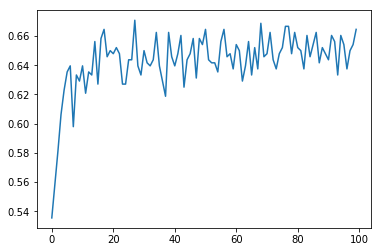

In [39]:
n_trees = 100
trees = range(n_trees)
accuracy = np.zeros(n_trees)

for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx+1)
    classifier = classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(y_test, predictions)
    
plt.cla()
plt.plot(trees, accuracy)
plt.show()

We were not able to greatly improve the result of the prediction. As you can see on the graph, the best value of the classifier is slightly higher than 0.66. We can conclude that at first 20 trees the increase of the number of trees increases the accuracy of predictions